In [3]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 516 (delta 162), reused 129 (delta 93), pack-reused 269 (from 1)
Receiving objects: 100% (516/516), 165.71 KiB | 9.75 MiB/s, done.
Resolving deltas: 100% (264/264), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
Installing RAPIDS remaining 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 739.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

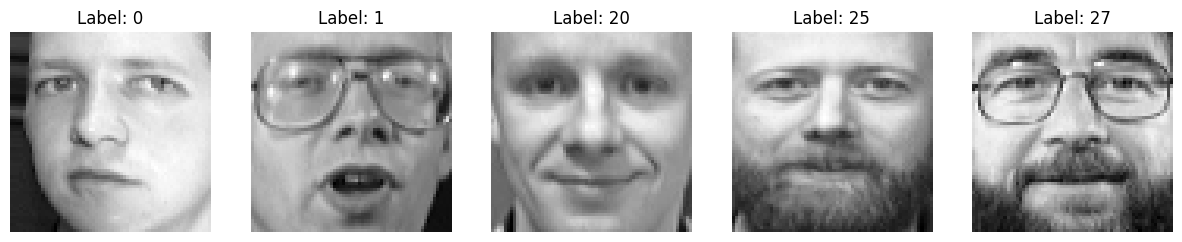

In [6]:
import matplotlib.pyplot as plt

# Reshape the data to be displayed as images
n_samples, h, w = dt.images.shape
x_train_images = x_train.reshape(-1, h, w)

# Display some sample images
num_samples_to_show = 5  # You can change this to show more or fewer images
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_show):
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(x_train_images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()



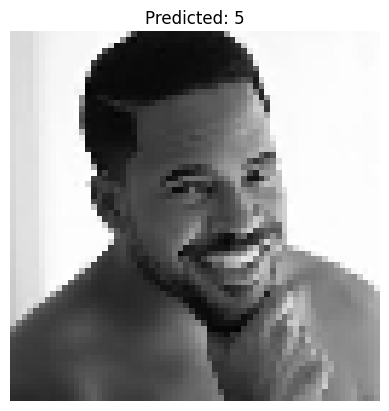

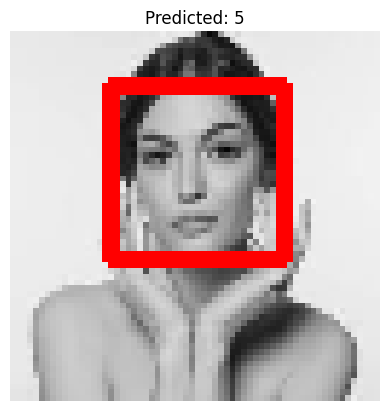

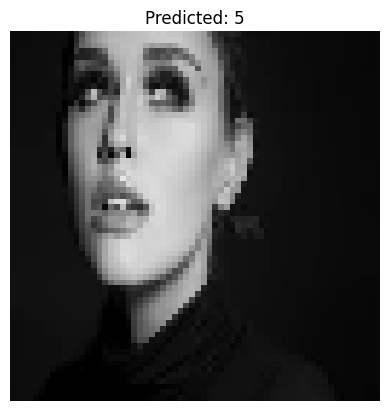

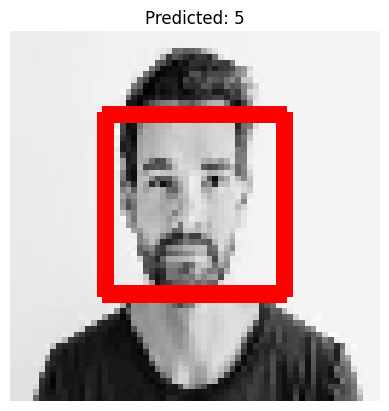

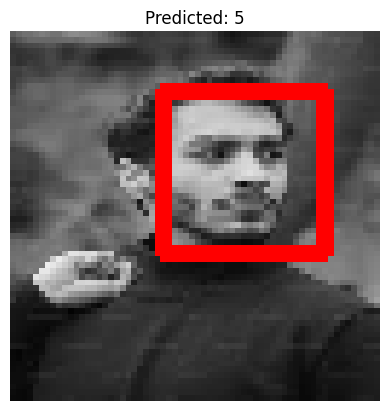

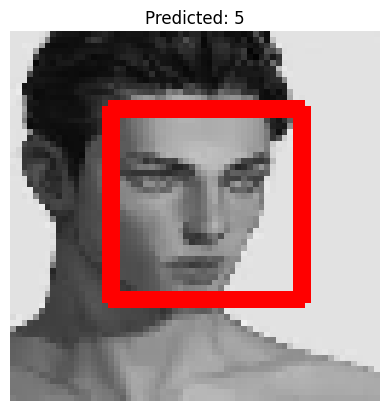

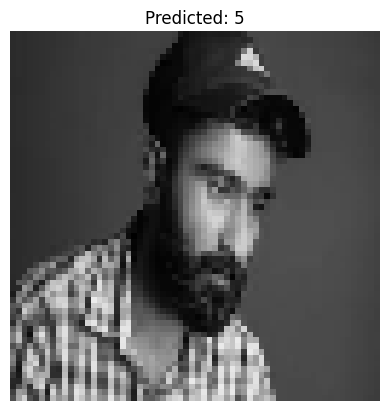

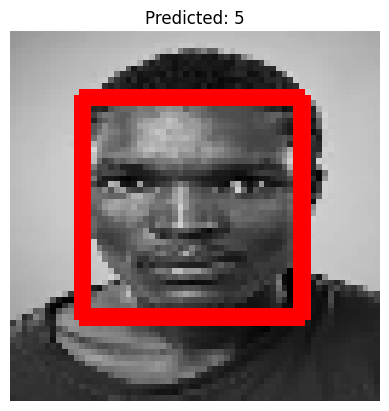

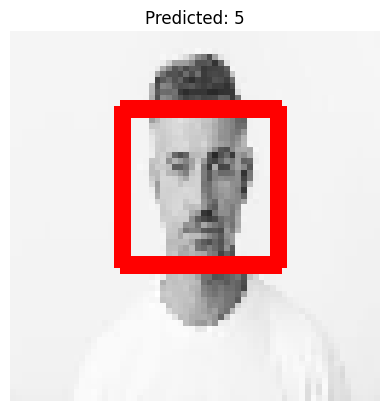

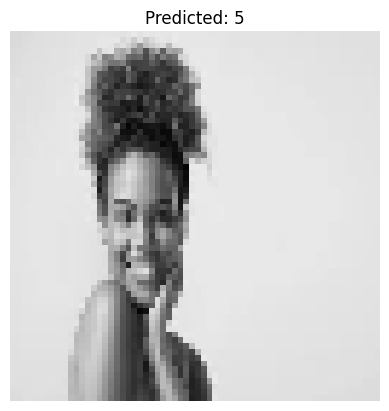

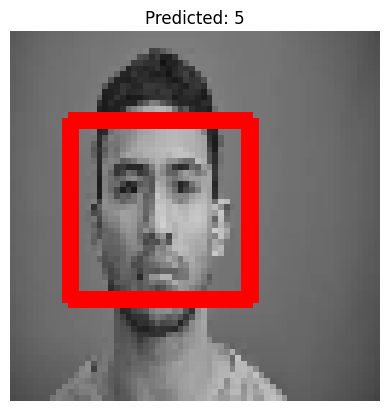

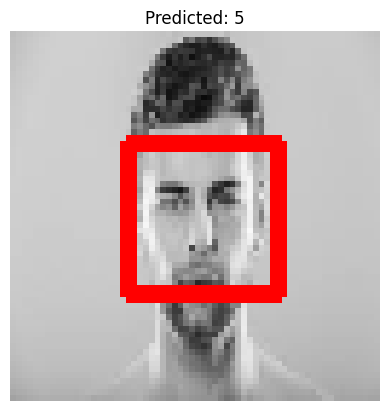

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from cuml.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Olivetti Faces dataset
dt = fetch_olivetti_faces()
x_train, x_test, y_train, y_test = train_test_split(dt.data, dt.target, test_size=0.2, random_state=42)

# Initialize and train the KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(x_train, y_train)

# Function to predict and draw rectangle
def predict_and_draw_rectangle(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    # Check if image loading was successful
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    image_resized = cv2.resize(image, (64, 64))  # Resize to 64x64 as in the dataset
    image_flattened = image_resized.flatten().reshape(1, -1)  # Flatten and reshape for prediction

    # Predict using the trained model
    predicted_label = model_1.predict(image_flattened)

    # Convert grayscale image to RGBA for transparency
    image_rgba = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2RGBA)

    # Create a face detector (Haarcascade) for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image_resized, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangle around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image_rgba, (x, y), (x + w, y + h), (255, 0, 0, 255), 2)  # Blue rectangle

    # Display the image with the prediction
    plt.imshow(image_rgba)
    plt.title(f'Predicted: {predicted_label[0]}')
    plt.axis('off')
    plt.show()

# Test with your custom image
# Ensure the path is correct and the file exists
for i in range(1, 13):
    image_path = f"img{i}.jfif"  # Adjust the path if your images are in a different directory
    predict_and_draw_rectangle(image_path)

In [7]:
from sklearn.metrics import classification_report


model_1_predictions = model_1.predict(x_test)

print(classification_report(y_test, model_1_predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.75      0.75      0.75         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         1
          14       0.75      1.00      0.86         3
          15       1.00      0.50      0.67         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
